In [29]:
import requests
from io import BytesIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_context("talk")
%matplotlib inline

In [2]:
maddison=requests.get("https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.xlsx")

In [3]:
with BytesIO(maddison.content) as file:
    data=pd.read_excel(file,sheet_name="Full data")

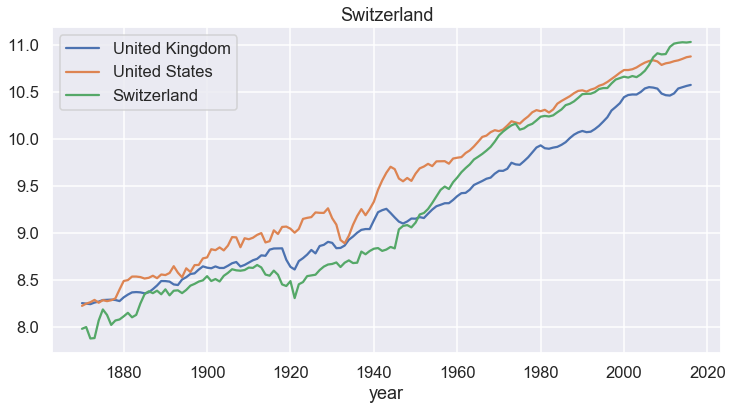

In [208]:
def get_base_dataframe(code):
    return (
        (
            data.query("country==@code and year>=1870")[["year", "cgdppc"]].set_index(
                "year"
            )
        )
        .rename(columns={"cgdppc": code})
        .pipe(pd.np.log)
    )


def plot_country(code):

    t = get_base_dataframe(code)
    t.plot(figsize=(12, 6), ax=plt.gca())
    plt.title(code)


plot_country("United Kingdom")
plot_country("United States")
plot_country("Switzerland")

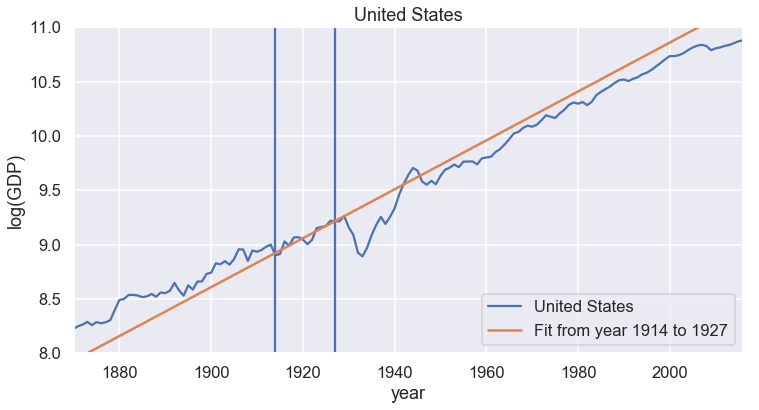

In [237]:
from sklearn.linear_model import LinearRegression


def plot_reg_from(
    code="United States", from_year=1800, to_year=2016, linewidth=2.5, marker=None
):
    t = get_base_dataframe(code)
    t2 = t[(t.index >= from_year) & (t.index <= to_year)]
    linreg = LinearRegression()
    linreg.fit(t2.index.values.reshape(-1, 1), t2[code])
    pred = linreg.predict(t.index.values.reshape(-1, 1))
    plt.plot(
        t.index,
        pred,
        label=f"Fit from year {from_year} to {to_year}",
        linewidth=linewidth,
        marker=marker,
    )


def plot_country_reg(code,from_year,to_year):
    get_base_dataframe(code).rename(
        columns={"loggdp": "Maddison GDP per capita data"}
    ).plot(figsize=(12, 6))
    plt.axvline(from_year)
    plt.axvline(to_year)
    plot_reg_from(code,from_year=from_year, to_year=to_year)

    plt.legend()
    plt.ylabel("log(GDP)")
    plt.xlim([1870, 2016])
    plt.ylim([8, 11])
    plt.title(code)


plot_country_reg("United States",1914,1927)
plt.savefig("usa_gdp_growth.png")

In [247]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



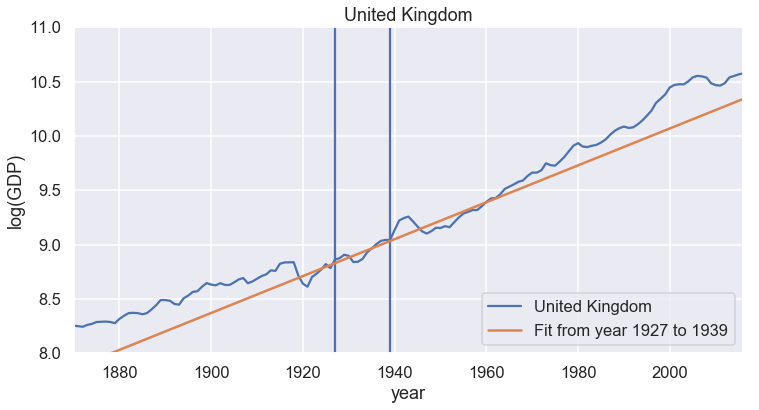

In [245]:
plot_country_reg("United Kingdom",1927,1939)

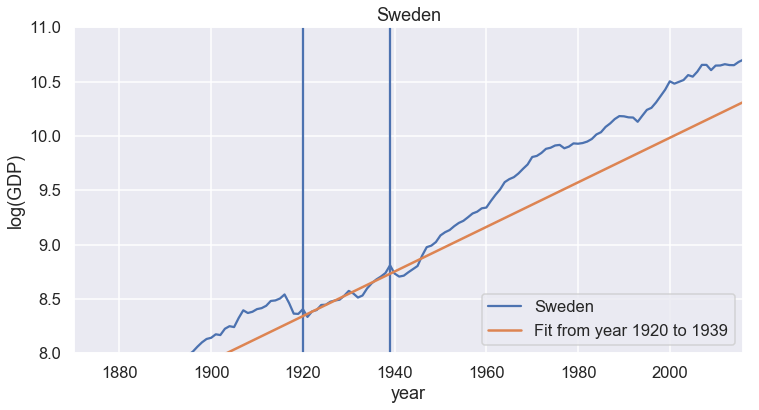

In [233]:
plot_country_reg("Sweden",1920,1939)

In [13]:
t=(data.query('countrycode=="USA" and year==1936')
 [['year','cgdppc',"pop"]]
  )
t['pop']/(t.cgdppc*1000)*100

18879    1.324151
dtype: float64

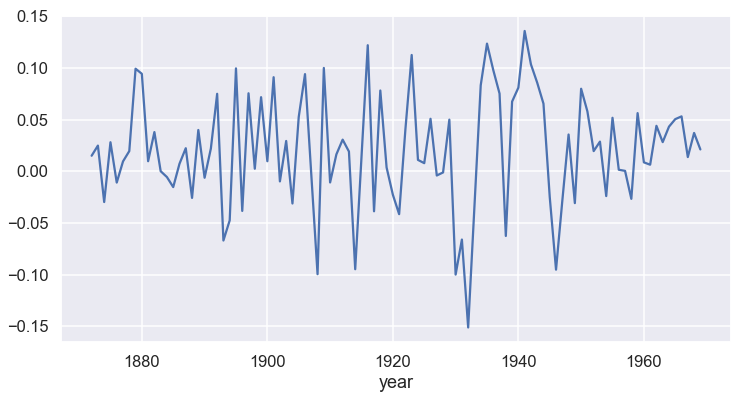

In [118]:
t = (
    data.query('country=="United States" and year>1870 and year<1970')
    .dropna(subset=["cgdppc"])
    .set_index("year")
    .cgdppc.pct_change()
    #.pipe(lambda x: x[x>0])
   
    .plot(figsize=(12,6))
)

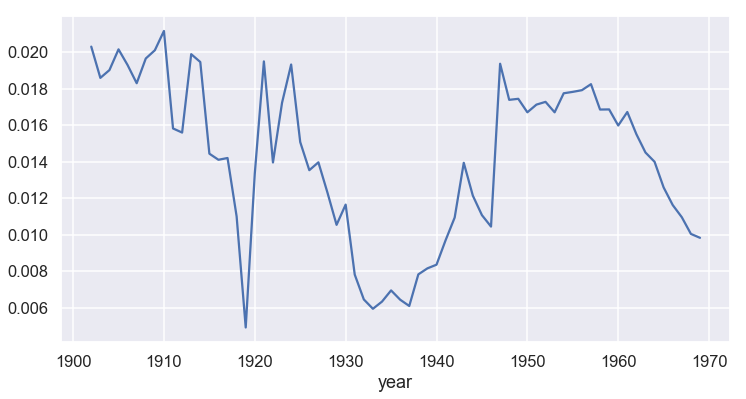

In [130]:
t = (
    data.query('country=="United States" and year>1900 and year<1970')
    .dropna(subset=["pop"])
    .set_index("year")
    ['pop'].pct_change()
    #.pipe(lambda x: x[x>0])
   
    .plot(figsize=(12,6))
)

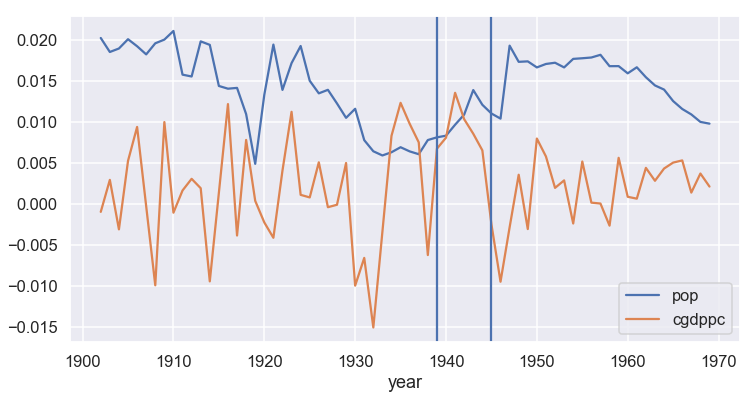

In [140]:
t = (
    data.query('country=="United States" and year>1900 and year<1970')

    .set_index("year")
    [['pop','cgdppc']].pct_change()
    #.pipe(lambda x: x[x>0])
    .assign(cgdppc=lambda x: x.cgdppc/10)

)
t.plot(figsize=(12,6))
plt.axvline(1939)
plt.axvline(1945)

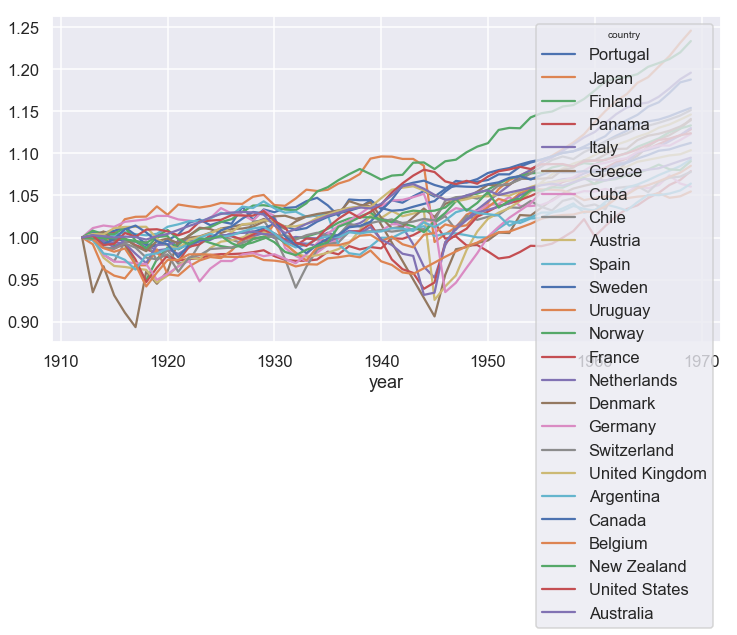

In [188]:
t = (
    data[["country", "cgdppc", "year"]]
    .query("year>1911 and year<1970")
    .groupby(["country", "year"])
    .sum()
    .cgdppc.unstack()
    .T.dropna(axis=1)
)
drop=(t==0).any().pipe(lambda x: x[x]).index

t=t.drop(columns=drop).pipe(pd.np.log)
keep=t.iloc[0].sort_values().pipe(lambda x: x[x>7.4]).index
t[keep].apply(lambda x: x/x.iloc[0]).plot(figsize=(12,6))